In [41]:
import pandas as pd
import numpy as np
import json
import re
import time
import datetime as dt
import matplotlib.pyplot as plt
import ast
import operator
from sklearn import linear_model, model_selection, feature_selection
from selenium import webdriver
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import collections

In [4]:

def get_features(row):
    """ access the wanted fields from one row of data """
    try:
        location_id = row["location"]["id"]
    except:
        location_id = None
    try:
        location_name = row["location"]["name"]
    except:
        location_name = None
    try:
        tags = row["tags"]
    except:
        tags = []
    timestamp = dt.datetime.fromtimestamp(row["taken_at_timestamp"])
    

    try:
        address_str = json.loads(row["location"]["address_json"])
        address = address_str["street_address"]
        zip_code = address_str["zip_code"]
        city_name = address_str["city_name"]
        region_name = address_str["region_name"]
    except:
        address_str = []
        address = []
        zip_code = []
        city_name = []
        region_name = []


    return [location_id, location_name, address, zip_code, city_name, region_name, tags, timestamp]

In [5]:
filepath = '100k.json'

start = time.time()

with open(filepath, encoding = 'utf8') as f:
    data = json.load(f)
data = data["GraphImages"]

end = time.time()
start = time.time()

df = pd.DataFrame(list(map(get_features, data)),
    columns = ["location_id", "location_name", "address", "zip_code", "city_name", "region_name", "tags", "timestamp"])

end = time.time()

In [7]:
print(df.address.values)

['' '' '' ... '' '' '']


In [62]:
locations=(df['location_name'].map(str) + df['address'].map(str)+ df['zip_code'].map(str)).values.tolist()
locations=df.location_name.values.tolist()
locations = [x for x in locations if x != []]
locations = [x for x in locations if x]
res = [] 
for val in locations: 
    if val != None : 
        res.append(val) 
n=100000
print(collections.Counter(res))

Counter({'Helsinki': 99957, 'Finland': 3, 'Porn sex tube videos xxx pics pussy in porno xnxx com': 2, 'TAVASTIA-klubi': 1, 'Naistenklinikan Synnytysosasto': 1, 'Linnanmäki': 1, 'Silencio Oy': 1, 'BasBas Kulma': 1, 'IDEALfit Eira': 1, 'Kalasatamanpuisto': 1, 'R/H': 1, 'Mall of Tripla': 1, 'Ooppera & Baletti': 1, 'Restaurant Demo': 1, 'Töölö': 1, "Mayor's Gym": 1, 'Finland / Lapland': 1, 'Radio Rock': 1, 'Helsinki Harbor': 1, 'Savoy-teatteri': 1, 'Pöllölaakso': 1, 'Satamakatu 5': 1, 'Suomenlinna Sveaborg': 1, 'Cafe Regatta': 1, 'Lauttasaari, Onnellisten saari': 1})


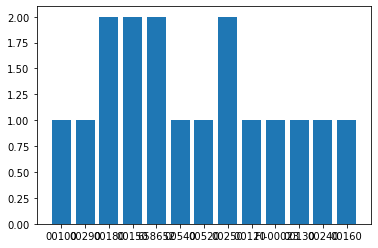

In [60]:
zipCodes=df.zip_code.values.tolist()
zipCodes = [x for x in zipCodes if x != []]
zipCodes = [x for x in zipCodes if x]
res=collections.Counter(zipCodes)
plt.bar(res.keys(), res.values())
plt.show()